In [1]:
## Initial setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import io
import requests
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Sets seed for the entire notebook

np.random.seed(42)

In [3]:
# Import data

url = "https://raw.githubusercontent.com/julesz12345/MLflow_BankruptcyPrediction/main/Data.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
bankruptcy = df.copy() # we can use this as raw data afterwards

In [4]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

*No missing values and no categorical variables in the dataset*

In [6]:
# Some more information about the dataset

display(df.shape)
display(df.isnull().sum())
display(df.describe())

(6819, 96)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

In [7]:
# Cheking for unique values

display(df['Liability-Assets Flag'].nunique())
display(df['Net Income Flag'].nunique())

KeyError: 'Liability-Assets Flag'

In [181]:
# Dropping these 2 columnds

# Liability-Assets Flag
# Net Income Flag

df['Liability-Assets Flag'].value_counts() 
df['Liability-Assets Flag'].corr(df['Bankrupt?'])

#df = df.drop(['Liability-Assets Flag'], axis=1)
df = df.drop(['Net Income Flag'], axis=1)

Text(0, 0.5, 'Number of companies')

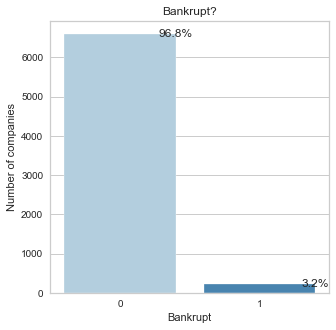

In [182]:
# We are checking for imbalanced data
# Print figure

import seaborn as sns

plt.figure(figsize=(5,5))
splot = sns.countplot(data = df,x = 'Bankrupt?',palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

In [183]:
# We are going to work later on on this issue.

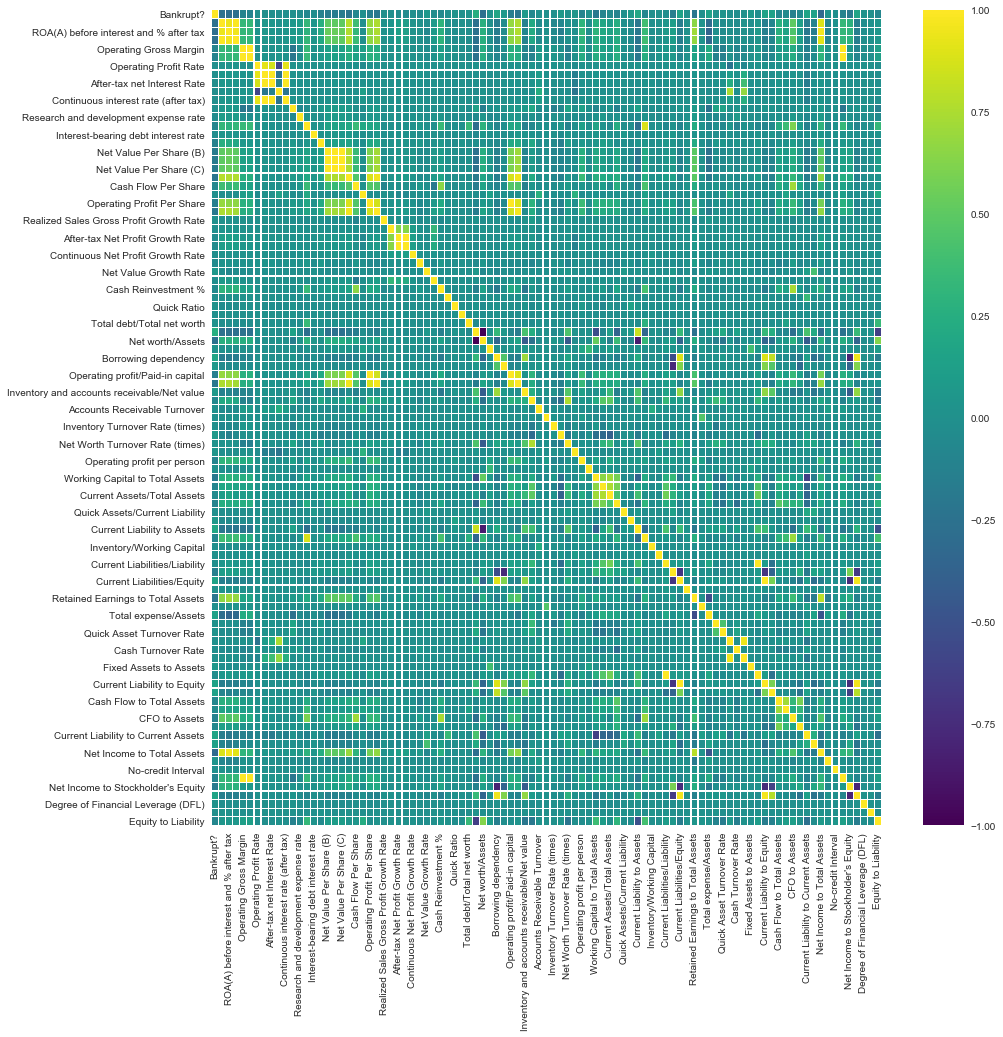

In [184]:
# Correlation

corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [185]:
# Variable creation
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

In [186]:
X.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256970e-04   
1                              0.781506            2.897850e-04   
2                              0.780284            2.361300e-04   
3                              0.781241            1.078890e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                

In [187]:
display(X.shape)
display(y.shape)

(6819, 94)

(6819,)

In [188]:
!pip install category_encoders

In [189]:
import category_encoders as ce

In [190]:
#Creating Synthetic Categorical feature
x =[]
for i in X['Retained Earnings to Total Assets']:
    if i < 0.931097:
        x.append('low')
    elif i >= 0.931097 and i < 0.937672:
        x.append('low-medium')
    elif i >= 0.937672 and i < 0.944811:
        x.append('high-medium')
    else:
        x.append('high')
X['Retained Earnings to Total Assets bin']=x

In [191]:
#Creating Synthetic Categorical feature
x =[]
for i in X['Per Share Net profit before tax']:
    if i < 0.17037:
        x.append('low')
    elif i >= 0.170370 and i < 0.179709:
        x.append('low-medium')
    elif i >= 0.179709 and i < 0.193493:
        x.append('high-medium')
    else:
        x.append('high')
X['Per Share Net profit before tax bin']=x

In [172]:
X.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256970e-04   
1                              0.781506            2.897850e-04   
2                              0.780284            2.361300e-04   
3                              0.781241            1.078890e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                

In [192]:
#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['Per Share Net profit before tax bin','Retained Earnings to Total Assets bin'],return_df=True,base=3)
#Fit and Transform Data
X=encoder.fit_transform(X)
X.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256970e-04   
1                              0.781506            2.897850e-04   
2                              0.780284            2.361300e-04   
3                              0.781241            1.078890e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                

## Preparing Data for ML models
*Splitting the data*

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test_final, y_train, y_test_final = train_test_split(X,y, test_size=0.2, random_state=42)

In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

In [195]:
X_train.shape

(4091, 100)

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(X_train)

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

In [197]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
X_test_final_prepared = full_pipeline.transform(X_test_final)

In [198]:
X_train_prepared = pd.DataFrame(X_train_prepared, columns=num_attribs)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=num_attribs)
X_test_final_prepared = pd.DataFrame(X_test_final_prepared, columns=num_attribs)

In [199]:
'''
#Scaling
from sklearn.preprocessing import StandardScaler
x_col = X.columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X.columns = x_col
#X.apply(pd.to_numeric)
display(X.head())
'''

'\n#Scaling\nfrom sklearn.preprocessing import StandardScaler\nx_col = X.columns\nscaler = StandardScaler()\nx_scaled = scaler.fit_transform(X)\nX = pd.DataFrame(x_scaled)\nX.columns = x_col\n#X.apply(pd.to_numeric)\ndisplay(X.head())\n'

In [200]:
display(X_train.shape)
display(y_train.shape)

(4091, 100)

(4091,)

In [201]:
count = 0
for i in y_train:
    if i == 1:
        count +=1
print("There are",count,"cases of bankruptcy and",len(y_train)-count,"of non-bankruptcy")

There are 128 cases of bankruptcy and 3963 of non-bankruptcy


In [202]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [203]:
y_train.reset_index(inplace=True)
y_train.drop(columns='index',axis=1,inplace=True)
y_test.reset_index(inplace=True)
y_test.drop(columns='index',inplace=True)
y_train.head()

Bankrupt?
0          0
1          0
2          0
3          0
4          0

### Base Model

In [204]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve



def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('ADABoost' , AdaBoostClassifier()))
    models.append(('XGB' , xgb.XGBClassifier()))
    models.append(('LightGBM' , lgb.LGBMClassifier()))
    return models

def bl_performance(X_train, y_train,models):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    results = []
    names = []
    acc = []
    f1 = []
    recall = []
    precision = []
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=['accuracy','f1','recall','precision'])
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results['test_accuracy'].mean()))
        print('{}: CV F1 score mean: {:.4}'.format(name, cv_results['test_f1'].mean()))
        print('{}: CV Recall score mean: {:.4}'.format(name, cv_results['test_recall'].mean()))
        print('{}: CV Precision score mean: {:.4}'.format(name, cv_results['test_precision'].mean()))
        acc += [cv_results['test_accuracy'].mean()]
        f1 += [cv_results['test_f1'].mean()]
        recall += [cv_results['test_recall'].mean()]
        precision += [cv_results['test_precision'].mean()]
        
        model.fit(X_train_prepared,y_train)
        y_pred = model.predict(X_test_prepared)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        
        
        plt.plot(fpr, tpr, label='{} Classifier Score: {:.4f}'.format(name,roc_auc_score(y_test, y_pred)))
        
        
        
    result_df = pd.DataFrame()
    result_df['Model'] = ['LR','KNN','SVM','GBC','RF','MLP','LDA','ADABoost','XGB','LightGBM']
    result_df['Accuracy'] = acc
    result_df['F1'] = f1
    result_df['Recall'] = recall
    result_df['Precision'] = precision
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
        
    return names, results, result_df

{'fit_time': array([0.1505661 , 0.13360667, 0.14214087, 0.09574699, 0.09275222]), 'score_time': array([0.01794934, 0.01296496, 0.00897598, 0.01096892, 0.01196837]), 'test_accuracy': array([0.96581197, 0.96210269, 0.9608802 , 0.97555012, 0.96577017]), 'test_f1': array([0.26315789, 0.34042553, 0.30434783, 0.375     , 0.17647059]), 'test_recall': array([0.22727273, 0.25806452, 0.25      , 0.28571429, 0.11538462]), 'test_precision': array([0.3125    , 0.5       , 0.38888889, 0.54545455, 0.375     ])}
LR: CV accuracy mean: 0.966
LR: CV F1 score mean: 0.2919
LR: CV Recall score mean: 0.2273
LR: CV Precision score mean: 0.4244
{'fit_time': array([0.00797939, 0.01496124, 0.01296544, 0.01495838, 0.01296401]), 'score_time': array([0.15162325, 0.17954493, 0.14461374, 0.16855097, 0.16363049]), 'test_accuracy': array([0.97313797, 0.96577017, 0.9608802 , 0.97555012, 0.97066015]), 'test_f1': array([0.26666667, 0.17647059, 0.05882353, 0.28571429, 0.25      ]), 'test_recall': array([0.18181818, 0.09677

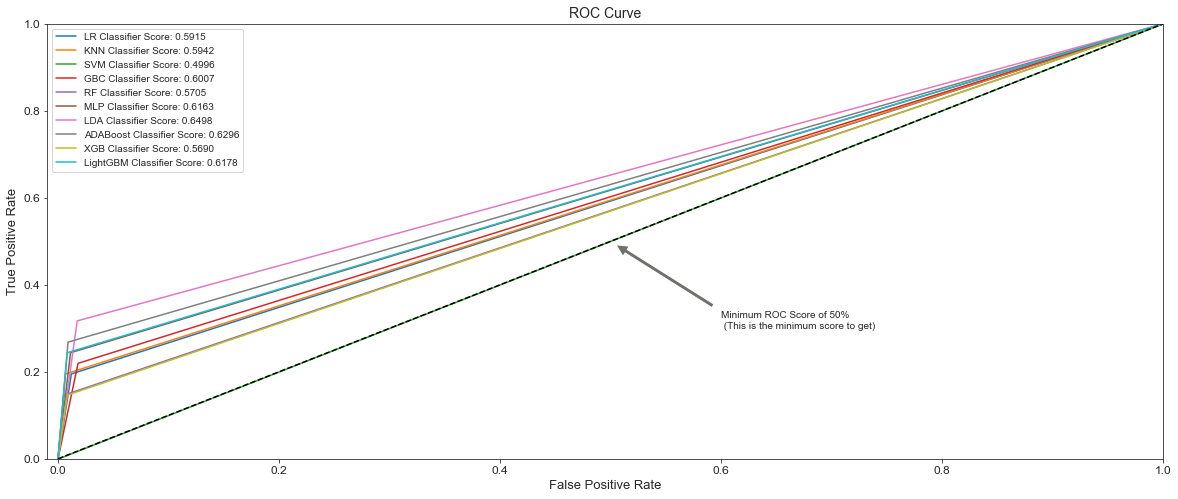

In [115]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train,models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [116]:
result_df

Model  Accuracy        F1    Recall  Precision
3       GBC  0.966021  0.345915  0.285762   0.444599
8       XGB  0.970667  0.334718  0.237510   0.577778
9  LightGBM  0.971155  0.324019  0.222500   0.599242
5       MLP  0.964311  0.319864  0.278851   0.383825
6       LDA  0.958932  0.317960  0.319660   0.320994
0        LR  0.966023  0.291880  0.227287   0.424369
7  ADABoost  0.963333  0.266796  0.223966   0.358517
4        RF  0.969444  0.242777  0.160572   0.548333
1       KNN  0.969200  0.207535  0.131726   0.580952
2       SVM  0.968466  0.000000  0.000000   0.000000

In [117]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## Feature Selection, resampling and data transformation

In [205]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(X_train_prepared)
score = iforest.decision_function(X_train_prepared)
from numpy import where
anom_index = where(pred==-1)
values = X.iloc[anom_index]

for i in values.index:
    X_train_prepared = X_train_prepared.drop(i)
    y_train = y_train.drop(i)

In [206]:
ctr = len(values)
print("Number of observations dropped = {}".format(ctr))

Number of observations dropped = 41


In [207]:
# Modelling with balanced target 

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_prepared, y_train)

sel = SelectFromModel(model)
sel.fit(X_test_prepared, y_test)

selected_feat= X_train.columns[(sel.get_support())]

In [121]:
!pip install imblearn

In [208]:
# Dealing with imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.6)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

#X_train_prepared, y_train = pipeline.fit_resample(X_train_prepared, y_train)
over_sample=SMOTE()
X_train_prepared, y_train=over_sample.fit_resample(X_train_prepared,y_train)

In [209]:
display(X_train_prepared.shape)
display(y_train.shape)

(7874, 100)

(7874, 1)

Text(0, 0.5, 'Number of companies')

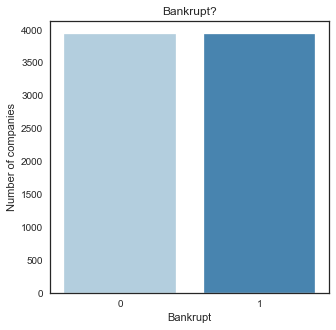

In [210]:
plt.figure(figsize=(5,5))
splot = sns.countplot(data = y_train, x = 'Bankrupt?', palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

### Dropping highly correlated columns (greater than 0.85)

In [125]:
!pip install rfpimp

In [211]:
import rfpimp
from rfpimp import plot_corr_heatmap
limit = 0.85
corr = X_train_prepared.corr()

In [212]:
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)

In [213]:
corr_no_diag

ROA(C) before interest and depreciation before interest  \
ROA(C) before interest and depreciation before ...                                                NaN         
ROA(A) before interest and % after tax                                                            NaN         
ROA(B) before interest and depreciation after tax                                                 NaN         
Operating Gross Margin                                                                            NaN         
Realized Sales Gross Margin                                                                       NaN         
Operating Profit Rate                                                                             NaN         
Pre-tax net Interest Rate                                                                         NaN         
After-tax net Interest Rate                                                                       NaN         
Non-industry income and expenditure/revenue                                                       NaN         
Continuous interest rate (after tax)                                                              NaN         
Operating Expense Rate                                                                            NaN         
Research and development expense rate                                                             NaN         
Cash flow rate                                                                                    NaN         
Interest-bearing debt interest rate                                                               NaN         
Tax rate (A)                                                                                      NaN         
Net Value Per Share (B)                                                                           NaN         
Net Value Per Share (A)                                                                           NaN         
Net Value Per Share (C)                                                                           NaN         
Persistent EPS in the Last Four Seasons                                                           NaN         
Cash Flow Per Share                                                                               NaN         
Revenue Per Share (Yuan ¥)                                                                        NaN         
Operating Profit Per Share                                                                        NaN         
Per Share Net profit before tax                                                                   NaN         
Realized Sales Gross Profit Growth Rate                                                           NaN         
Operating Profit Growth Rate                                                                      NaN         
After-tax Net Profit Growth Rate                                                                  NaN         
Regular Net Profit Growth Rate                                                                    NaN         
Continuous Net Profit Growth Rate                                                                 NaN         
Total Asset Growth Rate                                                                           NaN         
Net Value Growth Rate                                                                             NaN         
Total Asset Return Growth Rate Ratio                                                              NaN         
Cash Reinvestment %                                                                               NaN         
Current Ratio                                                                                     NaN         
Quick Ratio                                                                                       NaN         
Interest Expense Ratio                                                                            NaN         
Total debt/Total net worth                              

In [214]:
coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]

In [215]:
## Highly corelated columns
coll

['ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Realized Sales Gross Margin',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Continuous interest rate (after tax)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Operating Profit Per Share',
 'Per Share Net profit before tax',
 'Regular Net Profit Growth Rate',
 'Net worth/Assets',
 'Operating profit/Paid-in capital',
 'Net profit before tax/Paid-in capital',
 'Quick Assets/Current Liability',
 'Operating Funds to Liability',
 'Retained Earnings to Total Assets',
 'Working capitcal Turnover Rate',
 'Cash Flow to Sales',
 'Current Liability to Liability',
 'Current Liability to Equity',
 'CFO to Assets',
 'Cash Flow to Equity',
 'Liability-Assets Flag',
 'Net Income to Total Assets',
 'Gross Profit to Sales',
 "Net Income to Stockholder's Equity",
 'Liability to Equity']

### Variance threshold

In [216]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X_train_prepared)
var = sel.get_support()

col2 = []
for i in range(94):
    if not var[i]:
        col2.append(num_attribs[i])

In [217]:
col2

['Revenue Per Share (Yuan ¥)',
 'Contingent liabilities/Net worth',
 'Revenue per person',
 'Cash Flow to Sales',
 'Equity to Long-term Liability',
 'Liability-Assets Flag',
 "Net Income to Stockholder's Equity",
 'Liability to Equity']

In [218]:
## Highly corelated columns with variance > 0.16
col_del = coll.copy()
for i in coll:
    if i not in col2:
        col_del.append(i)
col_del

['ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Realized Sales Gross Margin',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Continuous interest rate (after tax)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Operating Profit Per Share',
 'Per Share Net profit before tax',
 'Regular Net Profit Growth Rate',
 'Net worth/Assets',
 'Operating profit/Paid-in capital',
 'Net profit before tax/Paid-in capital',
 'Quick Assets/Current Liability',
 'Operating Funds to Liability',
 'Retained Earnings to Total Assets',
 'Working capitcal Turnover Rate',
 'Cash Flow to Sales',
 'Current Liability to Liability',
 'Current Liability to Equity',
 'CFO to Assets',
 'Cash Flow to Equity',
 'Liability-Assets Flag',
 'Net Income to Total Assets',
 'Gross Profit to Sales',
 "Net Income to Stockholder's Equity",
 'Liability to Equity',
 'ROA(A) before interest and % after tax',
 'RO

In [219]:
## 31 columns removed
X_train_prepared_old = X_train_prepared.copy()
X_train_prepared.drop(columns=col_del,axis=1,inplace=True)

In [220]:
X_train_prepared.shape

(7874, 71)

In [136]:
'''
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)

filtered_col = correlation(df, 0.65).columns
df = df[filtered_col]
df
correlation(df, 0.65)
'''

'\ndef correlation(dataset, threshold):\n    col_corr = set() # Set of all the names of deleted columns\n    corr_matrix = dataset.corr()\n    for i in range(len(corr_matrix.columns)):\n        for j in range(i):\n            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):\n                colname = corr_matrix.columns[i] # getting the name of column\n                col_corr.add(colname)\n                if colname in dataset.columns:\n                    del dataset[colname] # deleting the column from the dataset\n\n    return(dataset)\n\nfiltered_col = correlation(df, 0.65).columns\ndf = df[filtered_col]\ndf\ncorrelation(df, 0.65)\n'

### Tree-Based Feature Selection

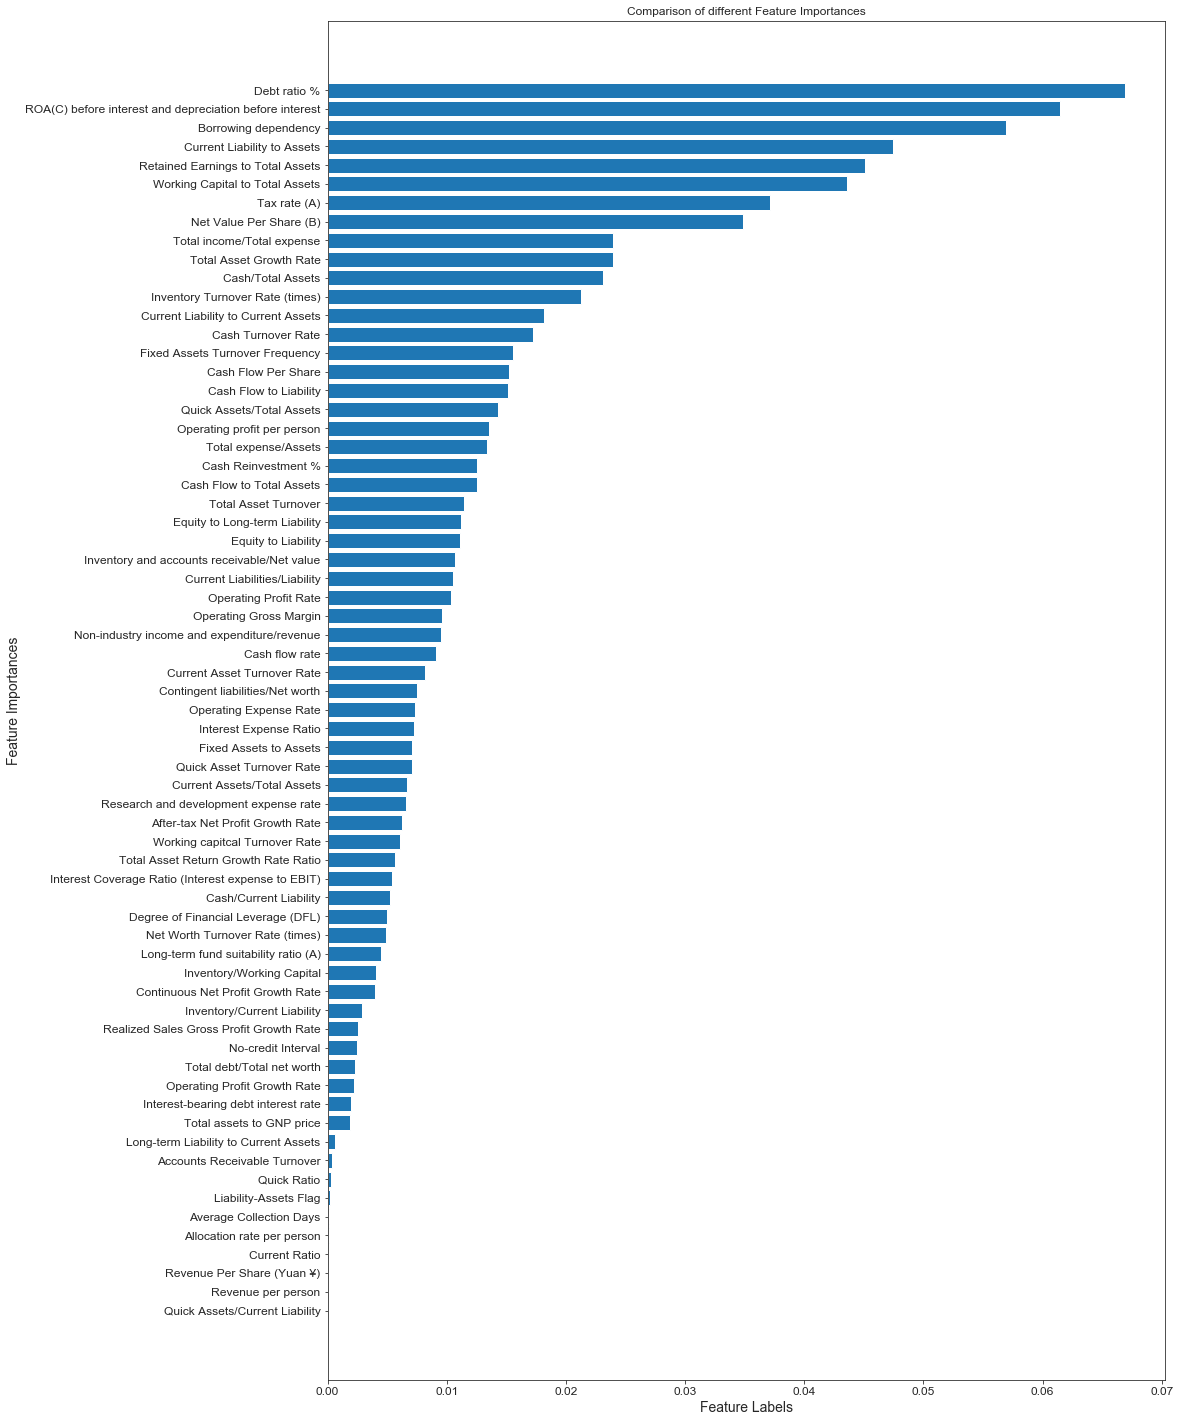

In [137]:
# feature selection (tree-based)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(X_train_prepared, y_train)
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": X_train_prepared.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()


### Recursive Feature Elimination

In [221]:
!pip install yellowbrick

In [222]:
from sklearn.feature_selection import RFE
from sklearn import ensemble
from yellowbrick.features import RFECV

## RFE

rf = RandomForestClassifier(random_state=42)
model = RFE(rf, n_features_to_select=50)
fit_model = model.fit(X_train_prepared, y_train)
features = pd.DataFrame(list(zip(X_train_prepared.columns,fit_model.ranking_)), columns = ['predictor','ranking'])

In [223]:
features = features.sort_values(by = 'ranking')

In [224]:
## RFE and Tree based feature importance signify that features with rank greater than 3 in RFE are insignificant
chosen_features = features[features['ranking']<3]

In [225]:
chosen_features.shape

(51, 2)

### Sequential Feature Selection

In [143]:
'''
import datetime
from datetime import *
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso

rf = RandomForestClassifier()

## Forward SFE

now = datetime.now()
sfs_forward = SequentialFeatureSelector(rf,n_features_to_select=10,direction='forward').fit(X_train_prepared, y_train)
print("Forward Sequential Feature Selection done in {}".format(datetime.now()-now))

## Backward SFE
now = datetime.now()
sfs_backward = SequentialFeatureSelector(rf,direction='backward').fit(X_train_prepared, y_train)
print("Backward Sequential Feature Selection done in {}".format(datetime.now()-now))

bool = sfs_forward.get_support()

chosen_features.reset_index(inplace=True)
chosen_features.drop(columns='index',axis=1,inplace=True)
chosen_features.shape

## chosen features from forward sequential feature selection
fwd_features = []
for i in range(51):
    if bool[i]:
        fwd_features.append(chosen_features['predictor'][i])
fwd_features
sfs_backward.get_support()


X_train_prepared_small = X_train_prepared[fwd_features]
X_test_prepared_small = X_test_prepared[fwd_features]
'''

'\nimport datetime\nfrom datetime import *\nfrom sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.linear_model import Lasso\n\nrf = RandomForestClassifier()\n\n## Forward SFE\n\nnow = datetime.now()\nsfs_forward = SequentialFeatureSelector(rf,n_features_to_select=10,direction=\'forward\').fit(X_train_prepared, y_train)\nprint("Forward Sequential Feature Selection done in {}".format(datetime.now()-now))\n\n## Backward SFE\nnow = datetime.now()\nsfs_backward = SequentialFeatureSelector(rf,direction=\'backward\').fit(X_train_prepared, y_train)\nprint("Backward Sequential Feature Selection done in {}".format(datetime.now()-now))\n\nbool = sfs_forward.get_support()\n\nchosen_features.reset_index(inplace=True)\nchosen_features.drop(columns=\'index\',axis=1,inplace=True)\nchosen_features.shape\n\n## chosen features from forward sequential feature selection\nfwd_features = []\nfor i in range(51):\n    if bool[i]:\n        fwd_features.append(chosen_features[\'predictor\

#### Selected Features

In [226]:
chosen_features

predictor  ranking
0   ROA(C) before interest and depreciation before...        1
34                    Net Worth Turnover Rate (times)        1
69              Per Share Net profit before tax bin_1        1
36                        Operating profit per person        1
38                    Working Capital to Total Assets        1
39                          Quick Assets/Total Assets        1
40                        Current Assets/Total Assets        1
41                                  Cash/Total Assets        1
43                        Current Liability to Assets        1
44                          Inventory/Working Capital        1
46                      Current Liabilities/Liability        1
47                             Working Capital/Equity        1
48                         Current Liabilities/Equity        1
32                    Inventory Turnover Rate (times)        1
50                         Total income/Total expense        1
54                                 Cash Turnover Rate        1
55                             Fixed Assets to Assets        1
56                      Equity to Long-term Liability        1
57                          Cash Flow to Total Assets        1
58                             Cash Flow to Liability        1
59                Current Liability to Current Assets        1
61                                 No-credit Interval        1
62                 Degree of Financial Leverage (DFL)        1
63  Interest Coverage Ratio (Interest expense to E...        1
64                                Equity to Liability        1
66            Retained Earnings to Total Assets bin_1        1
67            Retained Earnings to Total Assets bin_2        1
51                               Total expense/Assets        1
29                               Total Asset Turnover        1
70              Per Share Net profit before tax bin_2        1
14                   After-tax Net Profit Growth Rate        1
13                       Operating Profit Growth Rate        1
28        Inventory and accounts receivable/Net value        1
6                                      Cash flow rate        1
15                  Continuous Net Profit Growth Rate        1
16                            Total Asset Growth Rate        1
5               Research and development expense rate        1
10                                Cash Flow Per Share        1
19                                Cash Reinvestment %        1
3         Non-industry income and expenditure/revenue        1
9                             Net Value Per Share (B)        1
8                                        Tax rate (A)        1
2                               Operating Profit Rate        1
24                                       Debt ratio %        1
25               Long-term fund suitability ratio (A)        1
26                               Borrowing dependency        1
27                   Contingent liabilities/Net worth        1
1                              Operating Gross Margin        1
22                             Interest Expense Ratio        1
12            Realized Sales Gross Profit Growth Rate        1
53                          Quick Asset Turnover Rate        2

In [227]:
## Training and test set with selected features
X_train_prepared = X_train_prepared[chosen_features['predictor']]
X_test_prepared = X_test_prepared[chosen_features['predictor']]
X_test_final_prepared = X_test_final_prepared[chosen_features['predictor']]

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.16454697, 0.18151498, 0.16452503, 0.14561033, 0.16658854]), 'score_time': array([0.0199461 , 0.01795602, 0.0119679 , 0.01595688, 0.01595187]), 'test_accuracy': array([0.85768742, 0.85505404, 0.8862047 , 0.87666879, 0.86713287]), 'test_f1': array([0.27741935, 0.24      , 0.87731323, 0.93428184, 0.92883895]), 'test_recall': array([0.91489362, 0.9       , 0.91428571, 0.87666879, 0.86713287]), 'test_precision': array([0.1634981 , 0.13846154, 0.84321476, 1.        , 1.        ])}
LR: CV accuracy mean: 0.8685
LR: CV F1 score mean: 0.6516
LR: CV Recall score mean: 0.8946
LR: CV Precision score mean: 0.629


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-package

{'fit_time': array([0.02094364, 0.01293302, 0.01200914, 0.01296544, 0.00598311]), 'score_time': array([0.48774147, 0.45981097, 0.40293193, 0.28521156, 0.24734116]), 'test_accuracy': array([0.85578145, 0.86840432, 0.92689129, 1.        , 1.        ]), 'test_f1': array([0.29283489, 0.27874564, 0.92409241, 1.        , 1.        ]), 'test_recall': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.17153285, 0.16194332, 0.85889571, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.9302
KNN: CV F1 score mean: 0.6991
KNN: CV Recall score mean: 1.0
KNN: CV Precision score mean: 0.6385


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\va

{'fit_time': array([0.52760386, 0.55853677, 0.577456  , 0.6323204 , 1.33147287]), 'score_time': array([0.21441579, 0.21741843, 0.2423532 , 0.26926613, 0.57547498]), 'test_accuracy': array([0.92121982, 0.93197711, 0.95867769, 0.99364272, 0.98347107]), 'test_f1': array([0.43119266, 0.42780749, 0.95526497, 0.99681122, 0.99166667]), 'test_recall': array([1.        , 1.        , 0.99142857, 0.99364272, 0.98347107]), 'test_precision': array([0.2748538 , 0.27210884, 0.92164675, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.9578
SVM: CV F1 score mean: 0.7605
SVM: CV Recall score mean: 0.9937
SVM: CV Precision score mean: 0.6937


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([9.5075779 , 9.51852298, 9.44170928, 9.33505893, 9.5285306 ]), 'score_time': array([0.00797677, 0.00798082, 0.00797868, 0.00797701, 0.01695347]), 'test_accuracy': array([0.93202033, 0.93769866, 0.95486332, 0.9841068 , 0.97075652]), 'test_f1': array([0.44559585, 0.43023256, 0.95072866, 0.99198975, 0.98516129]), 'test_recall': array([0.91489362, 0.925     , 0.97857143, 0.9841068 , 0.97075652]), 'test_precision': array([0.29452055, 0.28030303, 0.92442645, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.9559
GBC: CV F1 score mean: 0.7607
GBC: CV Recall score mean: 0.9547
GBC: CV Precision score mean: 0.6999


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-p

{'fit_time': array([4.73832512, 3.13860655, 5.03253388, 2.30782795, 3.72499466]), 'score_time': array([0.02792048, 0.02892351, 0.03191519, 0.03291011, 0.13463902]), 'test_accuracy': array([0.96378653, 0.96376351, 0.97902098, 0.99427845, 0.99491418]), 'test_f1': array([0.62251656, 0.58394161, 0.97684211, 0.99713102, 0.99745061]), 'test_recall': array([1.        , 1.        , 0.99428571, 0.99427845, 0.99491418]), 'test_precision': array([0.45192308, 0.41237113, 0.96      , 1.        , 1.        ])}
RF: CV accuracy mean: 0.9792
RF: CV F1 score mean: 0.8356
RF: CV Recall score mean: 0.9967
RF: CV Precision score mean: 0.7649


C:\Users\Jules\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: 

{'fit_time': array([16.19895387,  9.69306993,  9.12857938,  9.92445064, 10.06108522]), 'score_time': array([0.01296425, 0.01396251, 0.01595831, 0.01595807, 0.01894879]), 'test_accuracy': array([0.9707751 , 0.97457088, 0.98537826, 1.        , 1.        ]), 'test_f1': array([0.67142857, 0.66666667, 0.98383696, 1.        , 1.        ]), 'test_recall': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.50537634, 0.5       , 0.96818811, 1.        , 1.        ])}
MLP: CV accuracy mean: 0.9861
MLP: CV F1 score mean: 0.8644
MLP: CV Recall score mean: 1.0
MLP: CV Precision score mean: 0.7947


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.0618341 , 0.0797863 , 0.06283164, 0.06881714, 0.08673692]), 'score_time': array([0.01196837, 0.00797892, 0.00997496, 0.01000214, 0.01096845]), 'test_accuracy': array([0.83163914, 0.83852511, 0.87158296, 0.85632549, 0.8518754 ]), 'test_f1': array([0.24501425, 0.21604938, 0.86126374, 0.92260274, 0.92001373]), 'test_recall': array([0.91489362, 0.875     , 0.89571429, 0.85632549, 0.8518754 ]), 'test_precision': array([0.14144737, 0.12323944, 0.82936508, 1.        , 1.        ])}
LDA: CV accuracy mean: 0.85
LDA: CV F1 score mean: 0.633
LDA: CV Recall score mean: 0.8788
LDA: CV Precision score mean: 0.6188


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([2.05949187, 1.64863324, 1.8889339 , 1.54886866, 1.65356278]), 'score_time': array([0.03287721, 0.02393913, 0.02593255, 0.02393413, 0.02789688]), 'test_accuracy': array([0.91486658, 0.91417673, 0.93897012, 0.94151303, 0.93515575]), 'test_f1': array([0.37383178, 0.30769231, 0.93258427, 0.96987557, 0.96649146]), 'test_recall': array([0.85106383, 0.75      , 0.94857143, 0.94151303, 0.93515575]), 'test_precision': array([0.23952096, 0.19354839, 0.91712707, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.9289
ADABoost: CV F1 score mean: 0.7101
ADABoost: CV Recall score mean: 0.8853
ADABoost: CV Precision score mean: 0.67


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([1.75613999, 1.24167848, 1.31049514, 2.02159238, 2.43348861]), 'score_time': array([0.01595688, 0.01695442, 0.0209434 , 0.02792645, 0.02892256]), 'test_accuracy': array([0.9707751 , 0.97457088, 0.98792117, 0.99809282, 1.        ]), 'test_f1': array([0.66176471, 0.64285714, 0.98659139, 0.9990455 , 1.        ]), 'test_recall': array([0.95744681, 0.9       , 0.99857143, 0.99809282, 1.        ]), 'test_precision': array([0.50561798, 0.5       , 0.9748954 , 1.        , 1.        ])}
XGB: CV accuracy mean: 0.9863
XGB: CV F1 score mean: 0.8581
XGB: CV Recall score mean: 0.9708
XGB: CV Precision score mean: 0.7961
[20:01:17] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d a

{'fit_time': array([0.66222692, 0.65923738, 0.66721559, 0.65823913, 0.84773254]), 'score_time': array([0.03590274, 0.03291035, 0.03490806, 0.03590226, 0.03291059]), 'test_accuracy': array([0.97331639, 0.97139224, 0.98537826, 0.99872854, 0.99809282]), 'test_f1': array([0.68181818, 0.62809917, 0.98381422, 0.99936387, 0.9990455 ]), 'test_recall': array([0.95744681, 0.95      , 0.99857143, 0.99872854, 0.99809282]), 'test_precision': array([0.52941176, 0.4691358 , 0.96948682, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.9854
LightGBM: CV F1 score mean: 0.8584
LightGBM: CV Recall score mean: 0.9806
LightGBM: CV Precision score mean: 0.7936


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



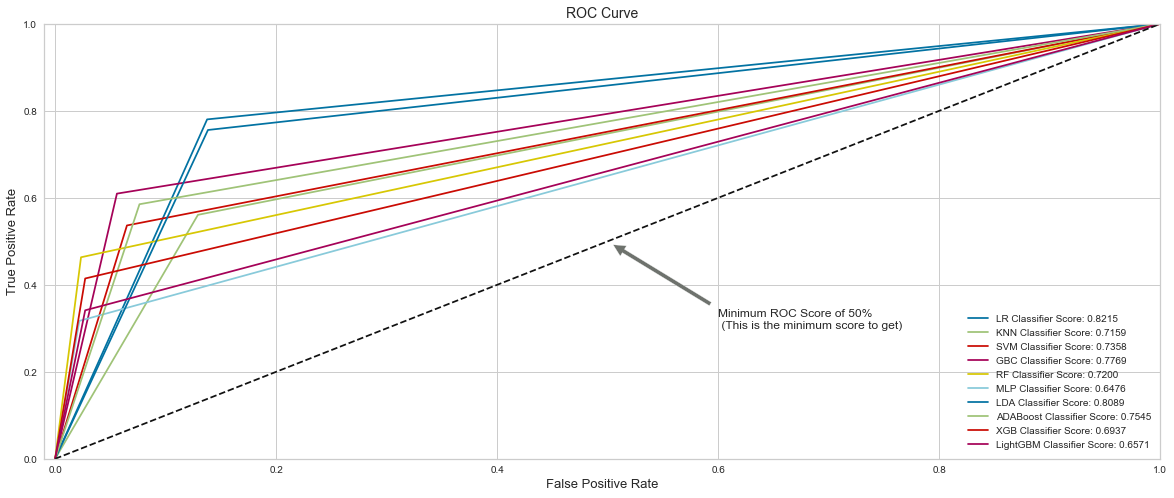

In [58]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train,models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [59]:
result_df

Model  Accuracy        F1    Recall  Precision
5       MLP  0.986145  0.864386  1.000000   0.794713
9  LightGBM  0.985382  0.858428  0.980568   0.793607
8       XGB  0.986272  0.858052  0.970822   0.796103
4        RF  0.979153  0.835576  0.996696   0.764859
3       GBC  0.955889  0.760742  0.954666   0.699850
2       SVM  0.957798  0.760549  0.993708   0.693722
7  ADABoost  0.928936  0.710095  0.885261   0.670039
1       KNN  0.930215  0.699135  1.000000   0.638474
0        LR  0.868550  0.651571  0.894596   0.629035
6       LDA  0.849990  0.632989  0.878762   0.618810

In [60]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## Dimensionality Reduction
### PCA

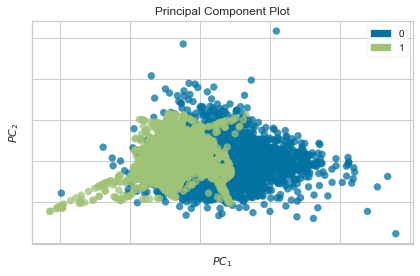

In [61]:
from yellowbrick.features.pca import (
 PCADecomposition,
)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
pca_viz = PCADecomposition(color=colors)
pca_viz.fit_transform(X_train_prepared, y_train['Bankrupt?'])
pca_viz.poof()

In [62]:
# Dimension Reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train_prepared_PCA = pca.fit_transform(X_train_prepared)

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.0418942 , 0.03291154, 0.02194142, 0.01795268, 0.0189867 ]), 'score_time': array([0.00897121, 0.01496005, 0.00897622, 0.00797749, 0.0089705 ]), 'test_accuracy': array([0.80177891, 0.82390337, 0.8518754 , 0.82835346, 0.80928163]), 'test_f1': array([0.21212121, 0.20630372, 0.84095563, 0.90611961, 0.8945889 ]), 'test_recall': array([0.89361702, 0.9       , 0.88      , 0.82835346, 0.80928163]), 'test_precision': array([0.12034384, 0.11650485, 0.80522876, 1.        , 1.        ])}
LR: CV accuracy mean: 0.823
LR: CV F1 score mean: 0.612
LR: CV Recall score mean: 0.8623
LR: CV Precision score mean: 0.6084


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-package

{'fit_time': array([0.05285907, 0.04393458, 0.01895213, 0.01895046, 0.019943  ]), 'score_time': array([0.52163982, 0.30017543, 0.1645577 , 0.1127007 , 0.10971141]), 'test_accuracy': array([0.85324015, 0.8677686 , 0.92879847, 0.99682136, 0.9955499 ]), 'test_f1': array([0.28923077, 0.27777778, 0.92582781, 0.99840815, 0.99776999]), 'test_recall': array([1.        , 1.        , 0.99857143, 0.99682136, 0.9955499 ]), 'test_precision': array([0.16906475, 0.16129032, 0.86296296, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.9284
KNN: CV F1 score mean: 0.6978
KNN: CV Recall score mean: 0.9982
KNN: CV Precision score mean: 0.6387


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.5674839 , 0.6064117 , 0.60338736, 0.70610976, 1.41421652]), 'score_time': array([0.23536825, 0.25328851, 0.27327013, 0.62233901, 0.61734819]), 'test_accuracy': array([0.88373571, 0.89701208, 0.92689129, 0.96567069, 0.95549905]), 'test_f1': array([0.33454545, 0.31932773, 0.92224476, 0.98253558, 0.97724317]), 'test_recall': array([0.9787234 , 0.95      , 0.97428571, 0.96567069, 0.95549905]), 'test_precision': array([0.20175439, 0.19191919, 0.87548139, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.9258
SVM: CV F1 score mean: 0.7072
SVM: CV Recall score mean: 0.9648
SVM: CV Precision score mean: 0.6538


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([2.49224162, 4.72436643, 2.5162642 , 3.69910526, 3.56745648]), 'score_time': array([0.00598407, 0.01595807, 0.00698018, 0.01396275, 0.00498676]), 'test_accuracy': array([0.87992376, 0.88048315, 0.91926256, 0.93897012, 0.92434838]), 'test_f1': array([0.32740214, 0.27692308, 0.91295408, 0.96852459, 0.96068715]), 'test_recall': array([0.9787234 , 0.9       , 0.95142857, 0.93897012, 0.92434838]), 'test_precision': array([0.1965812 , 0.16363636, 0.87747036, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.9086
GBC: CV F1 score mean: 0.6893
GBC: CV Recall score mean: 0.9387
GBC: CV Precision score mean: 0.6475


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-p

{'fit_time': array([2.57708168, 1.36537743, 1.27857971, 1.65058422, 2.76263857]), 'score_time': array([0.0289247 , 0.02889132, 0.02992082, 0.07480431, 0.07377338]), 'test_accuracy': array([0.94853875, 0.95486332, 0.97075652, 0.98283535, 0.98219962]), 'test_f1': array([0.53179191, 0.52980132, 0.96801113, 0.99134338, 0.99101988]), 'test_recall': array([0.9787234 , 1.        , 0.99428571, 0.98283535, 0.98219962]), 'test_precision': array([0.36507937, 0.36036036, 0.94308943, 1.        , 1.        ])}
RF: CV accuracy mean: 0.9678
RF: CV F1 score mean: 0.8024
RF: CV Recall score mean: 0.9876
RF: CV Precision score mean: 0.7337


C:\Users\Jules\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: 

{'fit_time': array([8.42845249, 6.63824177, 6.61131406, 6.57940006, 6.79681754]), 'score_time': array([0.00897622, 0.00598335, 0.00797772, 0.00897598, 0.00797796]), 'test_accuracy': array([0.95362135, 0.9612206 , 0.9771138 , 0.9955499 , 0.99809282]), 'test_f1': array([0.56287425, 0.56737589, 0.9748954 , 0.99776999, 0.9990455 ]), 'test_recall': array([1.        , 1.        , 0.99857143, 0.9955499 , 0.99809282]), 'test_precision': array([0.39166667, 0.3960396 , 0.95231608, 1.        , 1.        ])}
MLP: CV accuracy mean: 0.9771
MLP: CV F1 score mean: 0.8204
MLP: CV Recall score mean: 0.9984
MLP: CV Precision score mean: 0.748


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.02493238, 0.02493262, 0.01396203, 0.01994658, 0.02393651]), 'score_time': array([0.00797868, 0.00797892, 0.00897622, 0.00598383, 0.00897503]), 'test_accuracy': array([0.78653113, 0.79338843, 0.8474253 , 0.83534647, 0.82136046]), 'test_f1': array([0.20379147, 0.18546366, 0.83805668, 0.9102875 , 0.90191972]), 'test_recall': array([0.91489362, 0.925     , 0.88714286, 0.83534647, 0.82136046]), 'test_precision': array([0.11466667, 0.10306407, 0.79411765, 1.        , 1.        ])}
LDA: CV accuracy mean: 0.8168
LDA: CV F1 score mean: 0.6079
LDA: CV Recall score mean: 0.8767
LDA: CV Precision score mean: 0.6024


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.67020679, 0.6462698 , 0.58343744, 0.6003933 , 0.58144522]), 'score_time': array([0.01895022, 0.0189507 , 0.02194166, 0.01695442, 0.01895046]), 'test_accuracy': array([0.84434562, 0.8518754 , 0.87412587, 0.8474253 , 0.83280356]), 'test_f1': array([0.25981873, 0.22073579, 0.86269071, 0.91741225, 0.90877558]), 'test_recall': array([0.91489362, 0.825     , 0.88857143, 0.8474253 , 0.83280356]), 'test_precision': array([0.15140845, 0.12741313, 0.83827493, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.8501
ADABoost: CV F1 score mean: 0.6339
ADABoost: CV Recall score mean: 0.8617
ADABoost: CV Precision score mean: 0.6234


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([1.48602343, 0.70611   , 0.73702812, 0.74799824, 0.74002004]), 'score_time': array([0.01396275, 0.01296568, 0.0119679 , 0.01196861, 0.01296592]), 'test_accuracy': array([0.94091487, 0.94596313, 0.96884933, 0.99364272, 0.99046408]), 'test_f1': array([0.4972973 , 0.47852761, 0.96608997, 0.99681122, 0.9952092 ]), 'test_recall': array([0.9787234 , 0.975     , 0.99714286, 0.99364272, 0.99046408]), 'test_precision': array([0.33333333, 0.31707317, 0.93691275, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.968
XGB: CV F1 score mean: 0.7868
XGB: CV Recall score mean: 0.987
XGB: CV Precision score mean: 0.7175
[20:03:16] WARNING: C:/Users/Administrator/workspace/xgboos

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d a

{'fit_time': array([0.32014298, 0.3311131 , 0.32313371, 0.31216526, 0.33210969]), 'score_time': array([0.02593112, 0.02593303, 0.02692938, 0.02493262, 0.0249331 ]), 'test_accuracy': array([0.93456163, 0.94405594, 0.96884933, 0.99237127, 0.98537826]), 'test_f1': array([0.47715736, 0.46987952, 0.96599584, 0.99617103, 0.99263529]), 'test_recall': array([1.        , 0.975     , 0.99428571, 0.99237127, 0.98537826]), 'test_precision': array([0.31333333, 0.30952381, 0.93927126, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.965
LightGBM: CV F1 score mean: 0.7804
LightGBM: CV Recall score mean: 0.9894
LightGBM: CV Precision score mean: 0.7124


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



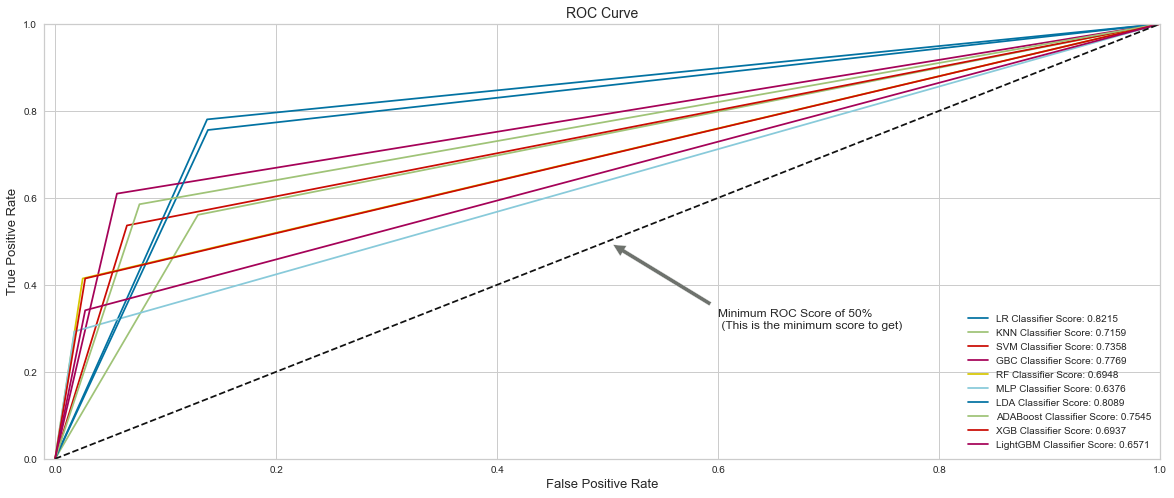

In [63]:
models = get_model()
names,results,result_df= bl_performance(X_train_prepared_PCA, y_train,models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

In [64]:
result_df

Model  Accuracy        F1    Recall  Precision
5       MLP  0.977120  0.820392  0.998443   0.748004
4        RF  0.967839  0.802394  0.987609   0.733706
8       XGB  0.967967  0.786787  0.986995   0.717464
9  LightGBM  0.965043  0.780368  0.989407   0.712426
2       SVM  0.925762  0.707179  0.964836   0.653831
1       KNN  0.928436  0.697803  0.998189   0.638664
3       GBC  0.908598  0.689298  0.938694   0.647538
7  ADABoost  0.850115  0.633887  0.861739   0.623419
0        LR  0.823039  0.612018  0.862250   0.608415
6       LDA  0.816810  0.607904  0.876749   0.602370

In [65]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

### t-SNE

Text(0, 0.5, 'Embedding 2')

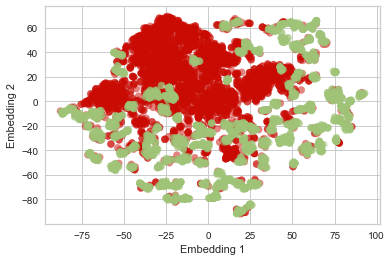

In [66]:
from sklearn.manifold import TSNE
ts = TSNE()
X_tsne = ts.fit_transform(X_train_prepared)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
scat = ax.scatter(
 X_tsne[:, 0],
 X_tsne[:, 1],
 c=colors,
 alpha=0.5,
)
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")

In [67]:
ts = TSNE(n_components=3)
X_tsne = ts.fit_transform(X_train_prepared)

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.0269289 , 0.01994634, 0.01496005, 0.01196742, 0.01196837]), 'score_time': array([0.00997305, 0.00598359, 0.00797868, 0.00498676, 0.00698233]), 'test_accuracy': array([0.72045743, 0.7221869 , 0.80991736, 0.70947235, 0.70565798]), 'test_f1': array([0.16030534, 0.13465347, 0.78809355, 0.83004835, 0.82743198]), 'test_recall': array([0.89361702, 0.85      , 0.79428571, 0.70947235, 0.70565798]), 'test_precision': array([0.08805031, 0.07311828, 0.78199719, 1.        , 1.        ])}
LR: CV accuracy mean: 0.7335
LR: CV F1 score mean: 0.5481
LR: CV Recall score mean: 0.7906
LR: CV Precision score mean: 0.5886


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\sit

{'fit_time': array([0.01496029, 0.01392412, 0.00794792, 0.00598431, 0.00697827]), 'score_time': array([0.09478498, 0.07782054, 0.04889965, 0.04190183, 0.04288435]), 'test_accuracy': array([0.88182973, 0.89256198, 0.94214876, 0.98474253, 0.9885569 ]), 'test_f1': array([0.33571429, 0.32128514, 0.93872054, 0.99231262, 0.99424552]), 'test_recall': array([1.        , 1.        , 0.99571429, 0.98474253, 0.9885569 ]), 'test_precision': array([0.20171674, 0.19138756, 0.88789809, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.938
KNN: CV F1 score mean: 0.7165
KNN: CV Recall score mean: 0.9938
KNN: CV Precision score mean: 0.6562


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.9096005 , 0.79483843, 0.81282592, 1.77524972, 1.77923989]), 'score_time': array([0.31315875, 0.31914496, 0.33211207, 0.7290504 , 0.71213102]), 'test_accuracy': array([0.78780178, 0.80228862, 0.86458996, 0.85950413, 0.84678957]), 'test_f1': array([0.21226415, 0.20460358, 0.85656566, 0.92444444, 0.91703959]), 'test_recall': array([0.95744681, 1.        , 0.90857143, 0.85950413, 0.84678957]), 'test_precision': array([0.1193634 , 0.11396011, 0.81019108, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.8322
SVM: CV F1 score mean: 0.623
SVM: CV Recall score mean: 0.9145
SVM: CV Precision score mean: 0.6087


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.59141779, 0.58543158, 0.59145522, 0.61036706, 0.74102139]), 'score_time': array([0.00598598, 0.00498724, 0.00598097, 0.0069828 , 0.01395869]), 'test_accuracy': array([0.86022872, 0.86904005, 0.89701208, 0.88366179, 0.8633185 ]), 'test_f1': array([0.29936306, 0.27464789, 0.88888889, 0.93823827, 0.9266462 ]), 'test_recall': array([1.        , 0.975     , 0.92571429, 0.88366179, 0.8633185 ]), 'test_precision': array([0.17602996, 0.15983607, 0.85488127, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.8747
GBC: CV F1 score mean: 0.6656
GBC: CV Recall score mean: 0.9295
GBC: CV Precision score mean: 0.6381


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-p

{'fit_time': array([0.49841309, 0.49171615, 0.49169445, 0.50864124, 0.82082391]), 'score_time': array([0.02690291, 0.0289309 , 0.03091574, 0.03289843, 0.07380271]), 'test_accuracy': array([0.9205845 , 0.92307692, 0.95549905, 0.97075652, 0.9612206 ]), 'test_f1': array([0.42922374, 0.39800995, 0.95212038, 0.98516129, 0.9802269 ]), 'test_recall': array([1.        , 1.        , 0.99428571, 0.97075652, 0.9612206 ]), 'test_precision': array([0.27325581, 0.2484472 , 0.91338583, 1.        , 1.        ])}
RF: CV accuracy mean: 0.9462
RF: CV F1 score mean: 0.7489
RF: CV Recall score mean: 0.9853
RF: CV Precision score mean: 0.687


C:\Users\Jules\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: 

{'fit_time': array([ 8.43141747, 11.04345655, 10.92876363, 10.9487102 , 10.52285004]), 'score_time': array([0.01396203, 0.01296544, 0.01196814, 0.01396275, 0.00997305]), 'test_accuracy': array([0.82465057, 0.82390337, 0.89192626, 0.85823268, 0.89828353]), 'test_f1': array([0.25405405, 0.22408964, 0.88575269, 0.92370852, 0.94641661]), 'test_recall': array([1.        , 1.        , 0.94142857, 0.85823268, 0.89828353]), 'test_precision': array([0.14551084, 0.12618297, 0.83629442, 1.        , 1.        ])}
MLP: CV accuracy mean: 0.8594
MLP: CV F1 score mean: 0.6468
MLP: CV Recall score mean: 0.9396
MLP: CV Precision score mean: 0.6216


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.01097178, 0.01097417, 0.01097059, 0.01097012, 0.01096988]), 'score_time': array([0.00997186, 0.00997019, 0.00897551, 0.01097155, 0.00598478]), 'test_accuracy': array([0.73125794, 0.73045137, 0.80737444, 0.7107438 , 0.70692943]), 'test_f1': array([0.16568047, 0.13821138, 0.78341673, 0.83091787, 0.8283054 ]), 'test_recall': array([0.89361702, 0.85      , 0.78285714, 0.7107438 , 0.70692943]), 'test_precision': array([0.09130435, 0.07522124, 0.78397711, 1.        , 1.        ])}
LDA: CV accuracy mean: 0.7374
LDA: CV F1 score mean: 0.5493
LDA: CV Recall score mean: 0.7888
LDA: CV Precision score mean: 0.5901


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'fit_time': array([0.3570447 , 0.29121852, 0.3021915 , 0.29022121, 0.30219102]), 'score_time': array([0.02892566, 0.02094316, 0.03391004, 0.0209446 , 0.02293897]), 'test_accuracy': array([0.8043202 , 0.81818182, 0.83916084, 0.77304514, 0.75524476]), 'test_f1': array([0.21827411, 0.1875    , 0.82069454, 0.87199713, 0.86055777]), 'test_recall': array([0.91489362, 0.825     , 0.82714286, 0.77304514, 0.75524476]), 'test_precision': array([0.12391931, 0.10576923, 0.81434599, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.798
ADABoost: CV F1 score mean: 0.5918
ADABoost: CV Recall score mean: 0.8191
ADABoost: CV Precision score mean: 0.6088


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([0.66521978, 0.67519188, 0.66920972, 0.67319775, 0.68815923]), 'score_time': array([0.01595831, 0.01695633, 0.01495957, 0.01496983, 0.01595688]), 'test_accuracy': array([0.90025413, 0.91417673, 0.94787031, 0.96185633, 0.95295613]), 'test_f1': array([0.37450199, 0.37209302, 0.94398907, 0.98055736, 0.97591146]), 'test_recall': array([1.        , 1.        , 0.98714286, 0.96185633, 0.95295613]), 'test_precision': array([0.23039216, 0.22857143, 0.90445026, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.9354
XGB: CV F1 score mean: 0.7294
XGB: CV Recall score mean: 0.9804
XGB: CV Precision score mean: 0.6727
[20:09:01] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d a

{'fit_time': array([0.18749833, 0.19447994, 0.19747162, 0.22439861, 0.19747066]), 'score_time': array([0.01895022, 0.01795268, 0.03590298, 0.01695538, 0.01994729]), 'test_accuracy': array([0.90406607, 0.91417673, 0.94214876, 0.96694215, 0.96439924]), 'test_f1': array([0.38367347, 0.36018957, 0.93771389, 0.98319328, 0.98187702]), 'test_recall': array([1.        , 0.95      , 0.97857143, 0.96694215, 0.96439924]), 'test_precision': array([0.23737374, 0.22222222, 0.90013141, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.9383
LightGBM: CV F1 score mean: 0.7293
LightGBM: CV Recall score mean: 0.972
LightGBM: CV Precision score mean: 0.6719


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



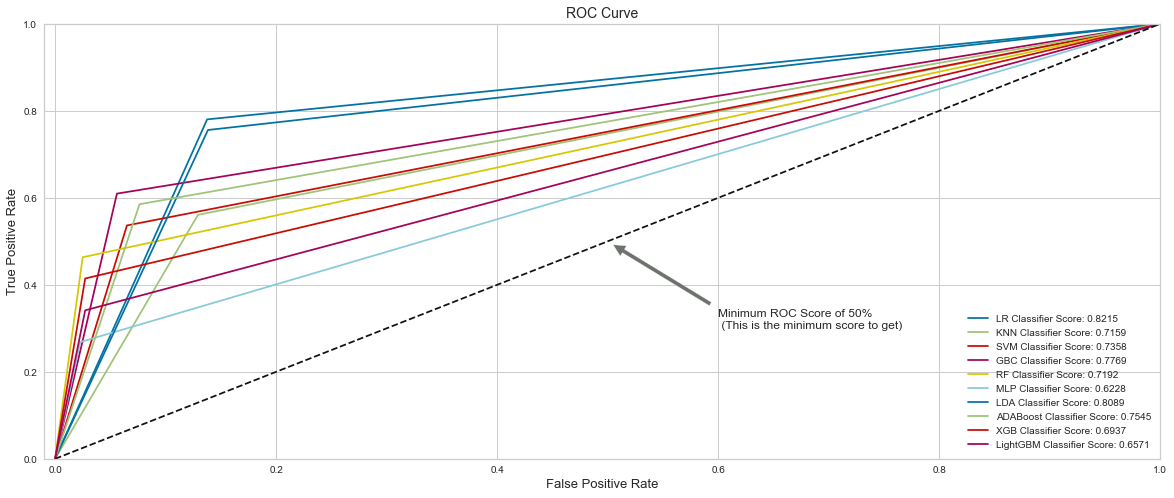

In [68]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_tsne, y_train,models)

In [69]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

Model  Accuracy        F1    Recall  Precision
4        RF  0.946228  0.748948  0.985253   0.687018
8       XGB  0.935423  0.729411  0.980391   0.672683
9  LightGBM  0.938347  0.729329  0.971983   0.671945
1       KNN  0.937968  0.716456  0.993803   0.656200
3       GBC  0.874652  0.665557  0.929539   0.638149
5       MLP  0.859399  0.646804  0.939589   0.621598
2       SVM  0.832195  0.622983  0.914462   0.608703
7  ADABoost  0.797991  0.591805  0.819065   0.608807
6       LDA  0.737351  0.549306  0.788829   0.590101
0        LR  0.733538  0.548107  0.790607   0.588633

In [70]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

### PHATE

In [71]:
!pip install phate

Calculating PHATE...
  Running PHATE on 7866 observations and 51 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 8.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.24 seconds.
  Calculated graph and diffusion operator in 8.79 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.28 seconds.
    Calculating KMeans...
    Calculated KMeans in 30.21 seconds.
  Calculated landmark operator in 33.38 seconds.
  Calculating optimal t...
    Automatically selected t = 11
  Calculated optimal t in 4.46 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.53 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 10.58 seconds.
Calculated PHATE in 58.76 seconds.


C:\Users\Jules\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.



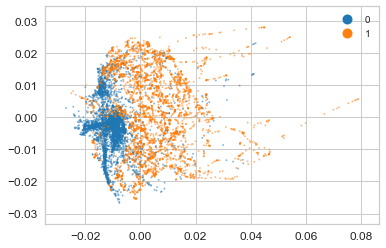

In [72]:
import phate
p = phate.PHATE(random_state=42)
X_phate = p.fit_transform(X_train_prepared)
X_phate.shape
fig, ax = plt.subplots(figsize=(6, 4))
phate.plot.scatter2d(p, c=y_train['Bankrupt?'], ax=ax, alpha=0.5)

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.03290462, 0.02194214, 0.02293849, 0.02792406, 0.02194238]), 'score_time': array([0.00997353, 0.00997615, 0.01296663, 0.01097035, 0.0119679 ]), 'test_accuracy': array([0.02986023, 0.02542912, 0.86649714, 0.05594406, 0.06420852]), 'test_f1': array([0.0579889 , 0.04959702, 0.84257871, 0.10596026, 0.12066906]), 'test_recall': array([1.        , 1.        , 0.80285714, 0.05594406, 0.06420852]), 'test_precision': array([0.02986023, 0.02542912, 0.88643533, 1.        , 1.        ])}
LR: CV accuracy mean: 0.2084
LR: CV F1 score mean: 0.2354
LR: CV Recall score mean: 0.5846
LR: CV Precision score mean: 0.5883


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-package

{'fit_time': array([0.02094221, 0.01695323, 0.00997353, 0.00897527, 0.00797868]), 'score_time': array([0.11868429, 0.07978773, 0.06881571, 0.06582665, 0.06083512]), 'test_accuracy': array([0.86340534, 0.85950413, 0.90082645, 0.91926256, 0.90845518]), 'test_f1': array([0.29967427, 0.26578073, 0.89211618, 0.95793309, 0.95203198]), 'test_recall': array([0.9787234 , 1.        , 0.92142857, 0.91926256, 0.90845518]), 'test_precision': array([0.17692308, 0.1532567 , 0.86461126, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.8903
KNN: CV F1 score mean: 0.6735
KNN: CV Recall score mean: 0.9456
KNN: CV Precision score mean: 0.639


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\va

{'fit_time': array([1.0990591 , 1.17884731, 1.07910991, 1.05617428, 1.06615043]), 'score_time': array([0.45578098, 0.46675372, 0.4428165 , 0.40790915, 0.4099009 ]), 'test_accuracy': array([0.8729352 , 0.87603306, 0.87603306, 0.82708201, 0.82835346]), 'test_f1': array([0.3006993 , 0.2804428 , 0.86001436, 0.90535839, 0.90611961]), 'test_recall': array([0.91489362, 0.95      , 0.85571429, 0.82708201, 0.82835346]), 'test_precision': array([0.17991632, 0.16450216, 0.86435786, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.8561
SVM: CV F1 score mean: 0.6505
SVM: CV Recall score mean: 0.8752
SVM: CV Precision score mean: 0.6418


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.67918277, 0.65424585, 0.63430691, 0.64826274, 0.64926338]), 'score_time': array([0.00897622, 0.00797915, 0.00797749, 0.00797939, 0.00698161]), 'test_accuracy': array([0.86213469, 0.87094723, 0.89574062, 0.88366179, 0.87349015]), 'test_f1': array([0.29773463, 0.28268551, 0.88531469, 0.93823827, 0.9324737 ]), 'test_recall': array([0.9787234 , 1.        , 0.90428571, 0.88366179, 0.87349015]), 'test_precision': array([0.17557252, 0.16460905, 0.86712329, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.8772
GBC: CV F1 score mean: 0.6673
GBC: CV Recall score mean: 0.928
GBC: CV Precision score mean: 0.6415


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-p

{'fit_time': array([0.82080531, 0.81880975, 0.82579231, 0.85171938, 0.84175014]), 'score_time': array([0.04488015, 0.04687715, 0.04487824, 0.05086422, 0.06382632]), 'test_accuracy': array([0.87420584, 0.87349015, 0.90464081, 0.9020979 , 0.89192626]), 'test_f1': array([0.31724138, 0.28673835, 0.89481066, 0.94852941, 0.94287634]), 'test_recall': array([0.9787234 , 1.        , 0.91142857, 0.9020979 , 0.89192626]), 'test_precision': array([0.18930041, 0.16736402, 0.87878788, 1.        , 1.        ])}
RF: CV accuracy mean: 0.8893
RF: CV F1 score mean: 0.678
RF: CV Recall score mean: 0.9368
RF: CV Precision score mean: 0.6471


C:\Users\Jules\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: 

{'fit_time': array([9.07272983, 9.24127936, 8.80249119, 9.20836544, 8.96800876]), 'score_time': array([0.0149591 , 0.01595688, 0.01396394, 0.00698209, 0.00797892]), 'test_accuracy': array([0.85006353, 0.88302606, 0.87221869, 0.7539733 , 0.77813096]), 'test_f1': array([0.27160494, 0.28125   , 0.85187915, 0.85973179, 0.87522345]), 'test_recall': array([0.93617021, 0.9       , 0.82571429, 0.7539733 , 0.77813096]), 'test_precision': array([0.15884477, 0.16666667, 0.87975647, 1.        , 1.        ])}
MLP: CV accuracy mean: 0.8275
MLP: CV F1 score mean: 0.6279
MLP: CV Recall score mean: 0.8388
MLP: CV Precision score mean: 0.6411


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.00598407, 0.00498652, 0.00598335, 0.01096988, 0.00698185]), 'score_time': array([0.00598478, 0.00598383, 0.00698209, 0.01196909, 0.00997281]), 'test_accuracy': array([0.8888183 , 0.9020979 , 0.84233948, 0.61538462, 0.59122695]), 'test_f1': array([0.32950192, 0.3       , 0.80223285, 0.76190476, 0.74310827]), 'test_recall': array([0.91489362, 0.825     , 0.71857143, 0.61538462, 0.59122695]), 'test_precision': array([0.20093458, 0.18333333, 0.90794224, 1.        , 1.        ])}
LDA: CV accuracy mean: 0.768
LDA: CV F1 score mean: 0.5873
LDA: CV Recall score mean: 0.733
LDA: CV Precision score mean: 0.6584


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.34707022, 0.27127409, 0.2583065 , 0.26432967, 0.26528978]), 'score_time': array([0.02991986, 0.02194405, 0.02393746, 0.02589393, 0.02293897]), 'test_accuracy': array([0.85578145, 0.86458996, 0.87539733, 0.77558805, 0.74698029]), 'test_f1': array([0.28391167, 0.25263158, 0.85878963, 0.8736126 , 0.85516739]), 'test_recall': array([0.95744681, 0.9       , 0.85142857, 0.77558805, 0.74698029]), 'test_precision': array([0.16666667, 0.14693878, 0.86627907, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.8237
ADABoost: CV F1 score mean: 0.6248
ADABoost: CV Recall score mean: 0.8463
ADABoost: CV Precision score mean: 0.636


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([0.64228153, 0.64128399, 0.64128447, 0.64726758, 0.65724015]), 'score_time': array([0.0139637 , 0.01595736, 0.01296449, 0.01496029, 0.01595807]), 'test_accuracy': array([0.87166455, 0.86967578, 0.9020979 , 0.90336936, 0.89637635]), 'test_f1': array([0.31292517, 0.28070175, 0.89185393, 0.9492318 , 0.94535702]), 'test_recall': array([0.9787234 , 1.        , 0.90714286, 0.90336936, 0.89637635]), 'test_precision': array([0.18623482, 0.16326531, 0.87707182, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.8886
XGB: CV F1 score mean: 0.676
XGB: CV Recall score mean: 0.9371
XGB: CV Precision score mean: 0.6453
[20:11:52] WARNING: C:/Users/Administrator/workspace/xgboo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d a

{'fit_time': array([0.18251014, 0.19148684, 0.18251181, 0.17553043, 0.18749762]), 'score_time': array([0.01496124, 0.01795244, 0.01595712, 0.01795292, 0.01496005]), 'test_accuracy': array([0.8729352 , 0.85823268, 0.90591227, 0.92434838, 0.906548  ]), 'test_f1': array([0.31506849, 0.2640264 , 0.89736477, 0.96068715, 0.95098366]), 'test_recall': array([0.9787234 , 1.        , 0.92428571, 0.92434838, 0.906548  ]), 'test_precision': array([0.1877551 , 0.15209125, 0.87196765, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.8936
LightGBM: CV F1 score mean: 0.6776
LightGBM: CV Recall score mean: 0.9468
LightGBM: CV Precision score mean: 0.6424


C:\Users\Jules\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



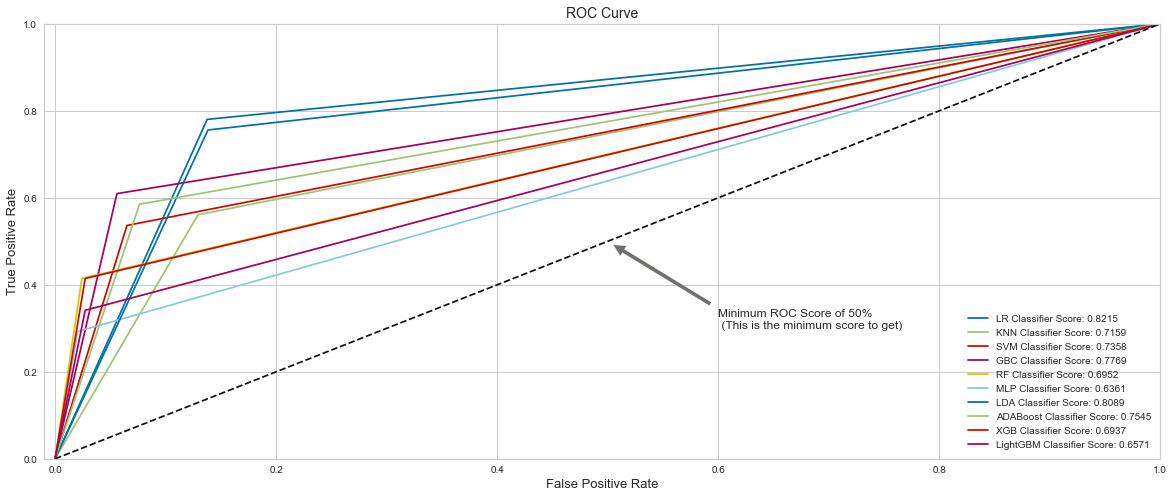

In [73]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_phate, y_train,models)

In [74]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

Model  Accuracy        F1    Recall  Precision
4        RF  0.889272  0.678039  0.936835   0.647090
9  LightGBM  0.893595  0.677626  0.946781   0.642363
8       XGB  0.888637  0.676014  0.937122   0.645314
1       KNN  0.890291  0.673507  0.945574   0.638958
3       GBC  0.877195  0.667289  0.928032   0.641461
2       SVM  0.856087  0.650527  0.875209   0.641755
5       MLP  0.827483  0.627938  0.838798   0.641054
7  ADABoost  0.823667  0.624823  0.846289   0.635977
6       LDA  0.767973  0.587350  0.733015   0.658442
0        LR  0.208388  0.235359  0.584602   0.588345

In [75]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## MLflow

In [80]:
!pip install mlflow

In [3]:
!pip install hyperopt

In [43]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll import scope
from IPython.display import Image
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier

In [228]:
hyperparameters = {"max_depth":scope.int(hp.quniform("max_depth",2,100,5)),
                "n_estimators":scope.int(hp.quniform("n_estimators",2,100,1)),
                "num_leaves": scope.int(hp.quniform("num_leaves",2,50,1)),
                "reg_alpha": hp.loguniform('reg_li',-5,5),
                "random_state":1,
                "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
                "min_child_weight": hp.uniform('min_child_weight', 0.5, 10),
                "boosting": hp.choice("boosting",["gbdt","dart","goss"]),
                "objective":"binary"}

In [229]:
def train_model(parameters):
    mlflow.lightgbm.autolog()
    with mlflow.start_run(nested=True):
        booster = lgb.LGBMClassifier()
        booster.set_params(**parameters)
        booster.fit(X_train_prepared,y_train)
        
        mlflow.log_params(parameters)
        
        score = cross_val_score(booster, X_train_prepared, y_train, cv=5, scoring = "f1_macro",n_jobs=-1)
        mean_score = np.mean(score)
        
        mlflow.log_metric('f1_macro', mean_score)
        
        return{'status':STATUS_OK,
               "loss":mean_score,
               'booster':booster.get_params}
    
with mlflow.start_run(run_name='lightgbm_bankruptcy'):
    best_params = fmin(
        fn=train_model,
        space=hyperparameters,
        algo=tpe.suggest,
        max_evals = 50,
        trials = Trials(),
        rstate=np.random.RandomState(1))

100%|██████████| 50/50 [01:02<00:00,  1.25s/trial, best loss: 0.8392687182094349]


In [ ]:
# To access the results
#http://localhost:5000

## Real Model

In [245]:
import mlflow
df = mlflow.search_runs(filter_string="metric.f1_macro > 0.8")

In [246]:
df

run_id experiment_id    status  \
0   88695dc22acb4b74bf926a8e88954170             0  FINISHED   
1   21c16db499ee4008ac444d77c77aad2b             0  FINISHED   
2   dde7cdd30b6345008db5d7835b9d6c36             0  FINISHED   
3   451db528d18e498abfa8cad4f69d84e6             0  FINISHED   
4   9f2aef79c7c9495da4547b545235a04a             0  FINISHED   
5   7907e900cd4d4baaadfada88614e4476             0  FINISHED   
6   b44310fe788248a6825583d01b3a8d85             0  FINISHED   
7   4634100653c34902bcbcd8fcbc4ba893             0  FINISHED   
8   a7988c8c88e643118846a7f835c3fc6c             0  FINISHED   
9   c8d75a0031e7494598b21e270be63281             0  FINISHED   
10  71f28c7905cc48a19c42ed93e8357d7c             0  FINISHED   
11  eebee744214b4a8fbf565eb4d2a1e9da             0  FINISHED   
12  bd55f759e20041aa8099516e6c37b876             0  FINISHED   
13  1e9c90f231ae4425bda81f7f60c2cf6b             0  FINISHED   
14  cbd87f8e3a644f3c9531640df80d07d0             0  FINISHED   
15  9fa0dbabbdeb41d191dac11fd1bc2371             0  FINISHED   
16  b068979ddbe242f89ee6b42977fe5a39             0  FINISHED   
17  f9e0e1405deb40c9a8679123c20421e9             0  FINISHED   
18  a2738e57a4c54dc29cab466c8e110b9f             0  FINISHED   
19  2f25bb47c5d745389edba2e7154aa0d4             0  FINISHED   
20  48faee537a47478c9b863d488a39d6dd             0  FINISHED   
21  2c2577c4b5fe47cc81da369bd785b35c             0  FINISHED   
22  c583ed058d18414782bc20f15837a431             0  FINISHED   
23  3a0ba6ed8bc545229e8c353c714e8979             0  FINISHED   
24  cf13995bd2a04eed8c8b04e9ee67ec22             0  FINISHED   
25  742bd5995874442eb0ef83c726b0d2de             0  FINISHED   
26  8b77b34563024ef6bb178e38601e1669             0  FINISHED   
27  d172a6198f8a4d19bbc34ebc1dccd861             0  FINISHED   
28  5d4ebecc79f64feabe5b385ae54027c7             0  FINISHED   
29  1f5bf501daba4b2ca1891a6d08915e09             0  FINISHED   
30  403cb8efdd194a408d5efa41e22d1069             0  FINISHED   
31  48e748dc71c24f0d94f592841db2920d             0  FINISHED   
32  f33fcf9ef9db49d9887e0be918a727f1             0  FINISHED   
33  ae46e4e9360d4046b2682b9a4e8a06cb             0  FINISHED   
34  fefb36e311ef49c18e135027a05e7cf7             0  FINISHED   
35  1c7c7669f1734cd8917d2084f4b62c49             0  FINISHED   
36  c9081993ec4e4fb78eb4090e1a93f623             0  FINISHED   
37  6d0be554fcec41f4b1116a46b1f6b43f             0  FINISHED   
38  585d1fa603e0431fb71e7f798bf9e383             0  FINISHED   
39  2c7d77583ba34eeeaccb58231828b89f             0  FINISHED   
40  b5df9a53940a4d98b98322435101b076             0  FINISHED   
41  dd804852201a4611b234527cb66e1fc2             0  FINISHED   
42  c478c02460ea4a22bfa04f3245ed38d7             0  FINISHED   
43  361e406f59d44c9ca1b016344bdf1fc5             0  FINISHED   
44  b4e1f8f05bed4185b4a9a7cf6c12c761             0  FINISHED   
45  a49ed1d9d811450c9b8b2a063ef32648             0  FINISHED   
46  3b2398f47ee243fba97c7725a117fa40             0  FINISHED   
47  b090481af18346d0b6681f8dfb7a89f7             0  FINISHED   
48  cd4501ee4f84458ead5035993fb38b32             0  FINISHED   
49  d80b07f151614a8daac9b77328ff456d             0  FINISHED   
50  bd540644be2b43eea518c46e8ca01c15             0  FINISHED   
51  e05412bca8b24925ab28247afedb8b65             0  FINISHED   
52  9175b272023e4a7b96210e117bad749b             0  FINISHED   
53  d13fe9a97e6c419aa298f0cd8e18b693             0  FINISHED   
54  e08f577edc7e4c06a67792d08d85eba9             0  FINISHED   
55  e70c65ba7aa34fb4814efee6fcd9c9fc             0  FINISHED   
56  0baf17a8a58e47d2b7987de2b9f74426             0  FINISHED   
57  b2a4d2a382584285a285d5427d8b6948             0  FINISHED   
58  043d356422b24119884e0754eb8beefe             0  FINISHED   
59  d9cefa4d2d164a2bbdb453e9574a23b7             0  FINISHED   
60  dde4d1eec613454692b8ca8a6ee78303             0  FINISHED   
61  6d59c88dd55e4093b4420af13bf06a30             0  FINISHED  

In [251]:
df.sort_values(by='metrics.f1_macro').iloc[0]

run_id                                      b068979ddbe242f89ee6b42977fe5a39
experiment_id                                                              0
status                                                              FINISHED
artifact_uri               file:///C:/Users/Jules/Documents/GitHub/Projec...
start_time                                  2021-04-10 19:03:18.926000+00:00
end_time                                    2021-04-10 19:03:19.323000+00:00
metrics.f1_macro                                                    0.839269
params.objective                                                      binary
params.num_leaves                                                          3
params.n_estimators                                                        3
params.learning_rate                                    0.014030545509875408
params.min_child_weight                                    6.593910963830766
params.random_state                                                        1

In [264]:
params = df.sort_values(by='metrics.f1_macro').iloc[0,7:16].to_dict()
params

{'params.objective': 'binary',
 'params.num_leaves': '3',
 'params.n_estimators': '3',
 'params.learning_rate': '0.014030545509875408',
 'params.min_child_weight': '6.593910963830766',
 'params.random_state': '1',
 'params.boosting': 'goss',
 'params.reg_alpha': '77.59828890918908',
 'params.max_depth': '80'}

In [265]:
params["params.objective"]

'binary'

In [ ]:
X_test_prepared = X_test_final[chosen_features['predictor']]
X_test_prepared = X_test_prepared[chosen_features['predictor']]
X_test_final_prepared = X_test_final_prepared[chosen_features['predictor']]

In [266]:
import lightgbm

In [286]:
train_data = lightgbm.Dataset(X_train_prepared, label=y_train)
valid_data = lightgbm.Dataset(X_test_prepared, label=y_test)
test_data = lightgbm.Dataset(X_test_final_prepared, label=y_test_final)

In [281]:
X_train_prepared.shape

(7874, 51)

In [271]:
parameters = {
    'objective': params["params.objective"],
    'boosting': params["params.boosting"],
    'num_leaves': int(params["params.num_leaves"]),
    'learning_rate': float(params["params.learning_rate"]),
    'n_estimators': int(params["params.n_estimators"]),
    'min_child_weight': float(params["params.min_child_weight"]),
    'random_state': 1,
    'reg_alpha':float(params["params.reg_alpha"]),
    'max_depth': int(params["params.max_depth"])
}

In [287]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=valid_data)

2021/04/10 15:56:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e5d707be1d7f4fa698b998dac4163108', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current lightgbm workflow


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3937, number of negative: 3937
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12786
[LightGBM] [Info] Number of data points in the train set: 7874, number of used features: 51
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	valid_0's binary_logloss: 0.687129
[2]	valid_0's binary_logloss: 0.681269
[3]	valid_0's binary_logloss: 0.675532


In [297]:
y_pred = model.predict(X_test_final_prepared)
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)

In [304]:
from sklearn.metrics import f1_score
f1_score(y_test_final, y_pred, average='weighted')

0.9214361826262211